In [12]:
file_path = '/Users/lfinkbeiner/Documents/GitHub/HERA/'
beam_origin = 'HERA_4.9m_E-pattern_151MHz.txt'
beam_destination = 'ant1_s2'

In [13]:
from RIMEz import beam_models
import numpy as np
from spin1_beam_model import cst_processing, jones_matrix_field

In [14]:
processor = cst_processing.CSTDataProcessor(
    [file_path + beam_origin,
    file_path + beam_origin,
    file_path + beam_origin],
    np.array([150e6, 151e6, 152e6]),
    1, 1e-4
)

In [15]:
processor.compute_spin1_harmonics()
processor.write_model_data(file_path, beam_destination)
spline_beam_func = beam_models.model_data_to_spline_beam_func(file_path + beam_destination + '.h5', np.array([150e6, 151e6, 152e6]))

//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:18: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.pos1_Elm_samples = h5f["pos1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:19: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.neg1_Elm_samples = h5f["neg1_Elm"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:20: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.freq_nodes = h5f["frequencies"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:21: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  self.L_model = h5f["spatial_bandlimit"].value
//anaconda3/envs/hera/lib/python3.7/site-packages/spin1_beam_model/jones_matrix_field.py:22: H5pyDeprec

delta_nu_in is 1000000.0


In [52]:
S = .5 * np.array([
        [1, 1, 0, 0],
        [0, 0, 1, 1j],
        [0, 0, 1, -1j],
        [1, -1, 0, 0]
    ])
def A_matrix(freq, alt, az):
    J = spline_beam_func(freq, alt, az)
    J_outer = np.kron(J, np.conj(J))
    return np.dot(S, np.dot(J_outer, np.linalg.inv(S)))

In [53]:
A = A_matrix(151e6, np.array([np.pi / 4]), np.array([np.pi]))

print('For the following results, I use altitude pi/4 and azimuth pi\n')

print('A Matrix, Full')
print(A)

# Here we can see that the journal criterion is NOT satisfied:
    # off-diagonal terms dominate the diagonal.
# Maybe that is just because we are using dummy data?
print('\nA Matrix, Magnitudes')
print(np.abs(A))

print('\nA Matrix, Real Components')
print(np.real(A))

print('\nA Matrix, Imaginary Components')
print(np.imag(A))

For the following results, I use altitude pi/4 and azimuth pi

A Matrix, Full
[[[-7.20266508e-07-6.07156038e-07j  4.93615423e-04-1.19490666e-03j
    4.93549352e-04+3.46835635e-04j -1.54006715e-07+3.23065006e-07j]]

 [[ 4.93409897e-04+9.74778890e-04j -1.48917287e-08-1.61965669e-08j
    5.11763584e-08-2.72520853e-08j -4.94284940e-04+1.25821129e-04j]]

 [[ 4.93446138e-04-1.25493571e-04j -5.11353449e-08+2.72696836e-08j
    1.49385636e-08+1.62141652e-08j -4.94321181e-04-9.74538265e-04j]]

 [[ 1.54732031e-07-3.23047407e-07j -4.94181726e-04-3.45916487e-04j
   -4.94115655e-04+1.19584792e-03j  7.21079672e-07+6.07138440e-07j]]]

A Matrix, Magnitudes
[[[9.42030943e-07 1.29284883e-03 6.03229575e-04 3.57895328e-07]]

 [[1.09254163e-03 2.20020990e-08 5.79801329e-08 5.10047604e-04]]

 [[5.09153933e-04 5.79522143e-08 2.20467647e-08 1.09273888e-03]]

 [[3.58192167e-07 6.03219525e-04 1.29390978e-03 9.42641490e-07]]]

A Matrix, Real Components
[[[-7.20266508e-07  4.93615423e-04  4.93549352e-04 -1.5400671

In [68]:
# Eventually: alt
x = np.linspace(0, 2 * np.pi, 100)
#print(x)

# Eventually: az
y = np.linspace(0, 2 * np.pi, 100)
#print(y)

A_mag_space = np.abs(A_matrix(151e6, x, y))
print(A_mag_space)

[[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [2.07965483e-06 5.88210819e-04 6.72769548e-04 2.81953000e-06]
  [1.97188700e-06 6.84941843e-04 6.64883264e-04 3.18074076e-06]
  [1.71356319e-06 8.72307925e-04 6.77257431e-04 3.97605751e-06]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [2.75624837e-04 3.15660133e-08 8.96931332e-09 2.21497812e-04]
  [3.15777931e-04 3.45959530e-08 1.40050253e-08 2.49043454e-04]
  [3.73207386e-04 4.03886319e-08 1.74449053e-08 2.92314047e-04]]

 [[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
  ...
  [2.91420373e-04 

(10000,)


ValueError: 'c' argument has 10000 elements, which is inconsistent with 'x' and 'y' with size 100.

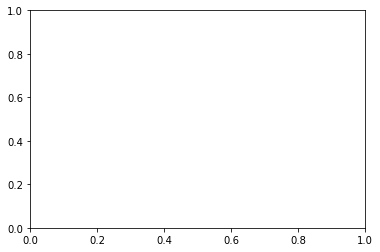

In [71]:
# to-do:
    # 1. see if we need radians or degrees
    # 2. convert hra-dec to az, alt
    # 3. combine plots for multiple Stokes parameters

import matplotlib.pyplot as plt

I_to_I = A_mag_space[0, :, 0]
scaled_I_to_I = (I_to_I - I_to_I.min()) / I_to_I.ptp()

colors = plt.cm.viridis(scaled_I_to_I)

# debug
print(scaled_I_to_I.shape)

plt.scatter(x * len(y), y * len(x), marker='+', c=colors, s=150, linewidths=4)
plt.show()

In [51]:
J_test = spline_beam_func(151e6, np.array([np.pi / 4, np.pi / 8]), np.array([np.pi, np.pi / 4]))

#A_matrix(151e6, np.array([np.pi / 4, np.pi / 4]), np.array([np.pi, np.pi]))
print(J_test.shape)

print(J_test)

(2, 2, 2)
[[[-2.76584962e-05-2.06096872e-06j  2.28540239e-02-3.19287792e-02j]
  [ 3.22238330e-02-7.87022980e-03j -1.53217075e-06-7.50443615e-07j]]

 [[-1.17859745e-02-5.24717431e-03j  1.14561059e-02+1.63285143e-02j]
  [ 9.60505692e-03+1.53844741e-02j -1.33376018e-02-7.58564348e-03j]]]
